In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.dates as mdates

In [23]:
df_monthly = pd.read_csv('monthly_deaths.csv')
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
df_monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [24]:
df_yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [25]:
print(f"Shape of df_monthly is: {df_monthly.shape}")
print(f"Shape of df_yearly is: {df_yearly.shape}")
print(f"The columns of df_monthly are: {df_monthly.columns}")
print(f"The columns of df_yearly are: {df_yearly.columns}")

Shape of df_monthly is: (98, 3)
Shape of df_yearly is: (12, 4)
The columns of df_monthly are: Index(['date', 'births', 'deaths'], dtype='object')
The columns of df_yearly are: Index(['year', 'births', 'deaths', 'clinic'], dtype='object')


In [26]:
print(f"ANy NaN Value in df_monthly: {df_monthly.isna().values.any()}")
print(f"ANy NaN Value in df_yearly: {df_yearly.isna().values.any()}")

ANy NaN Value in df_monthly: False
ANy NaN Value in df_yearly: False


In [27]:
print(f"Any Duplicated Values in df_monthly: {df_monthly.duplicated().values.any()}")
print(f"Any Duplicated Values in df_yearly: {df_yearly.duplicated().values.any()}")

Any Duplicated Values in df_monthly: False
Any Duplicated Values in df_yearly: False


In [28]:
# Percentage of women dying in childbirth
prob = df_yearly.deaths.sum()/df_yearly.births.sum()*100
print(f"The percentage of women dying in childbirth is: {prob:.3}%")

The percentage of women dying in childbirth is: 7.08%


In [63]:
df_monthly['date'] = pd.to_datetime(df_monthly['date'])

In [64]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

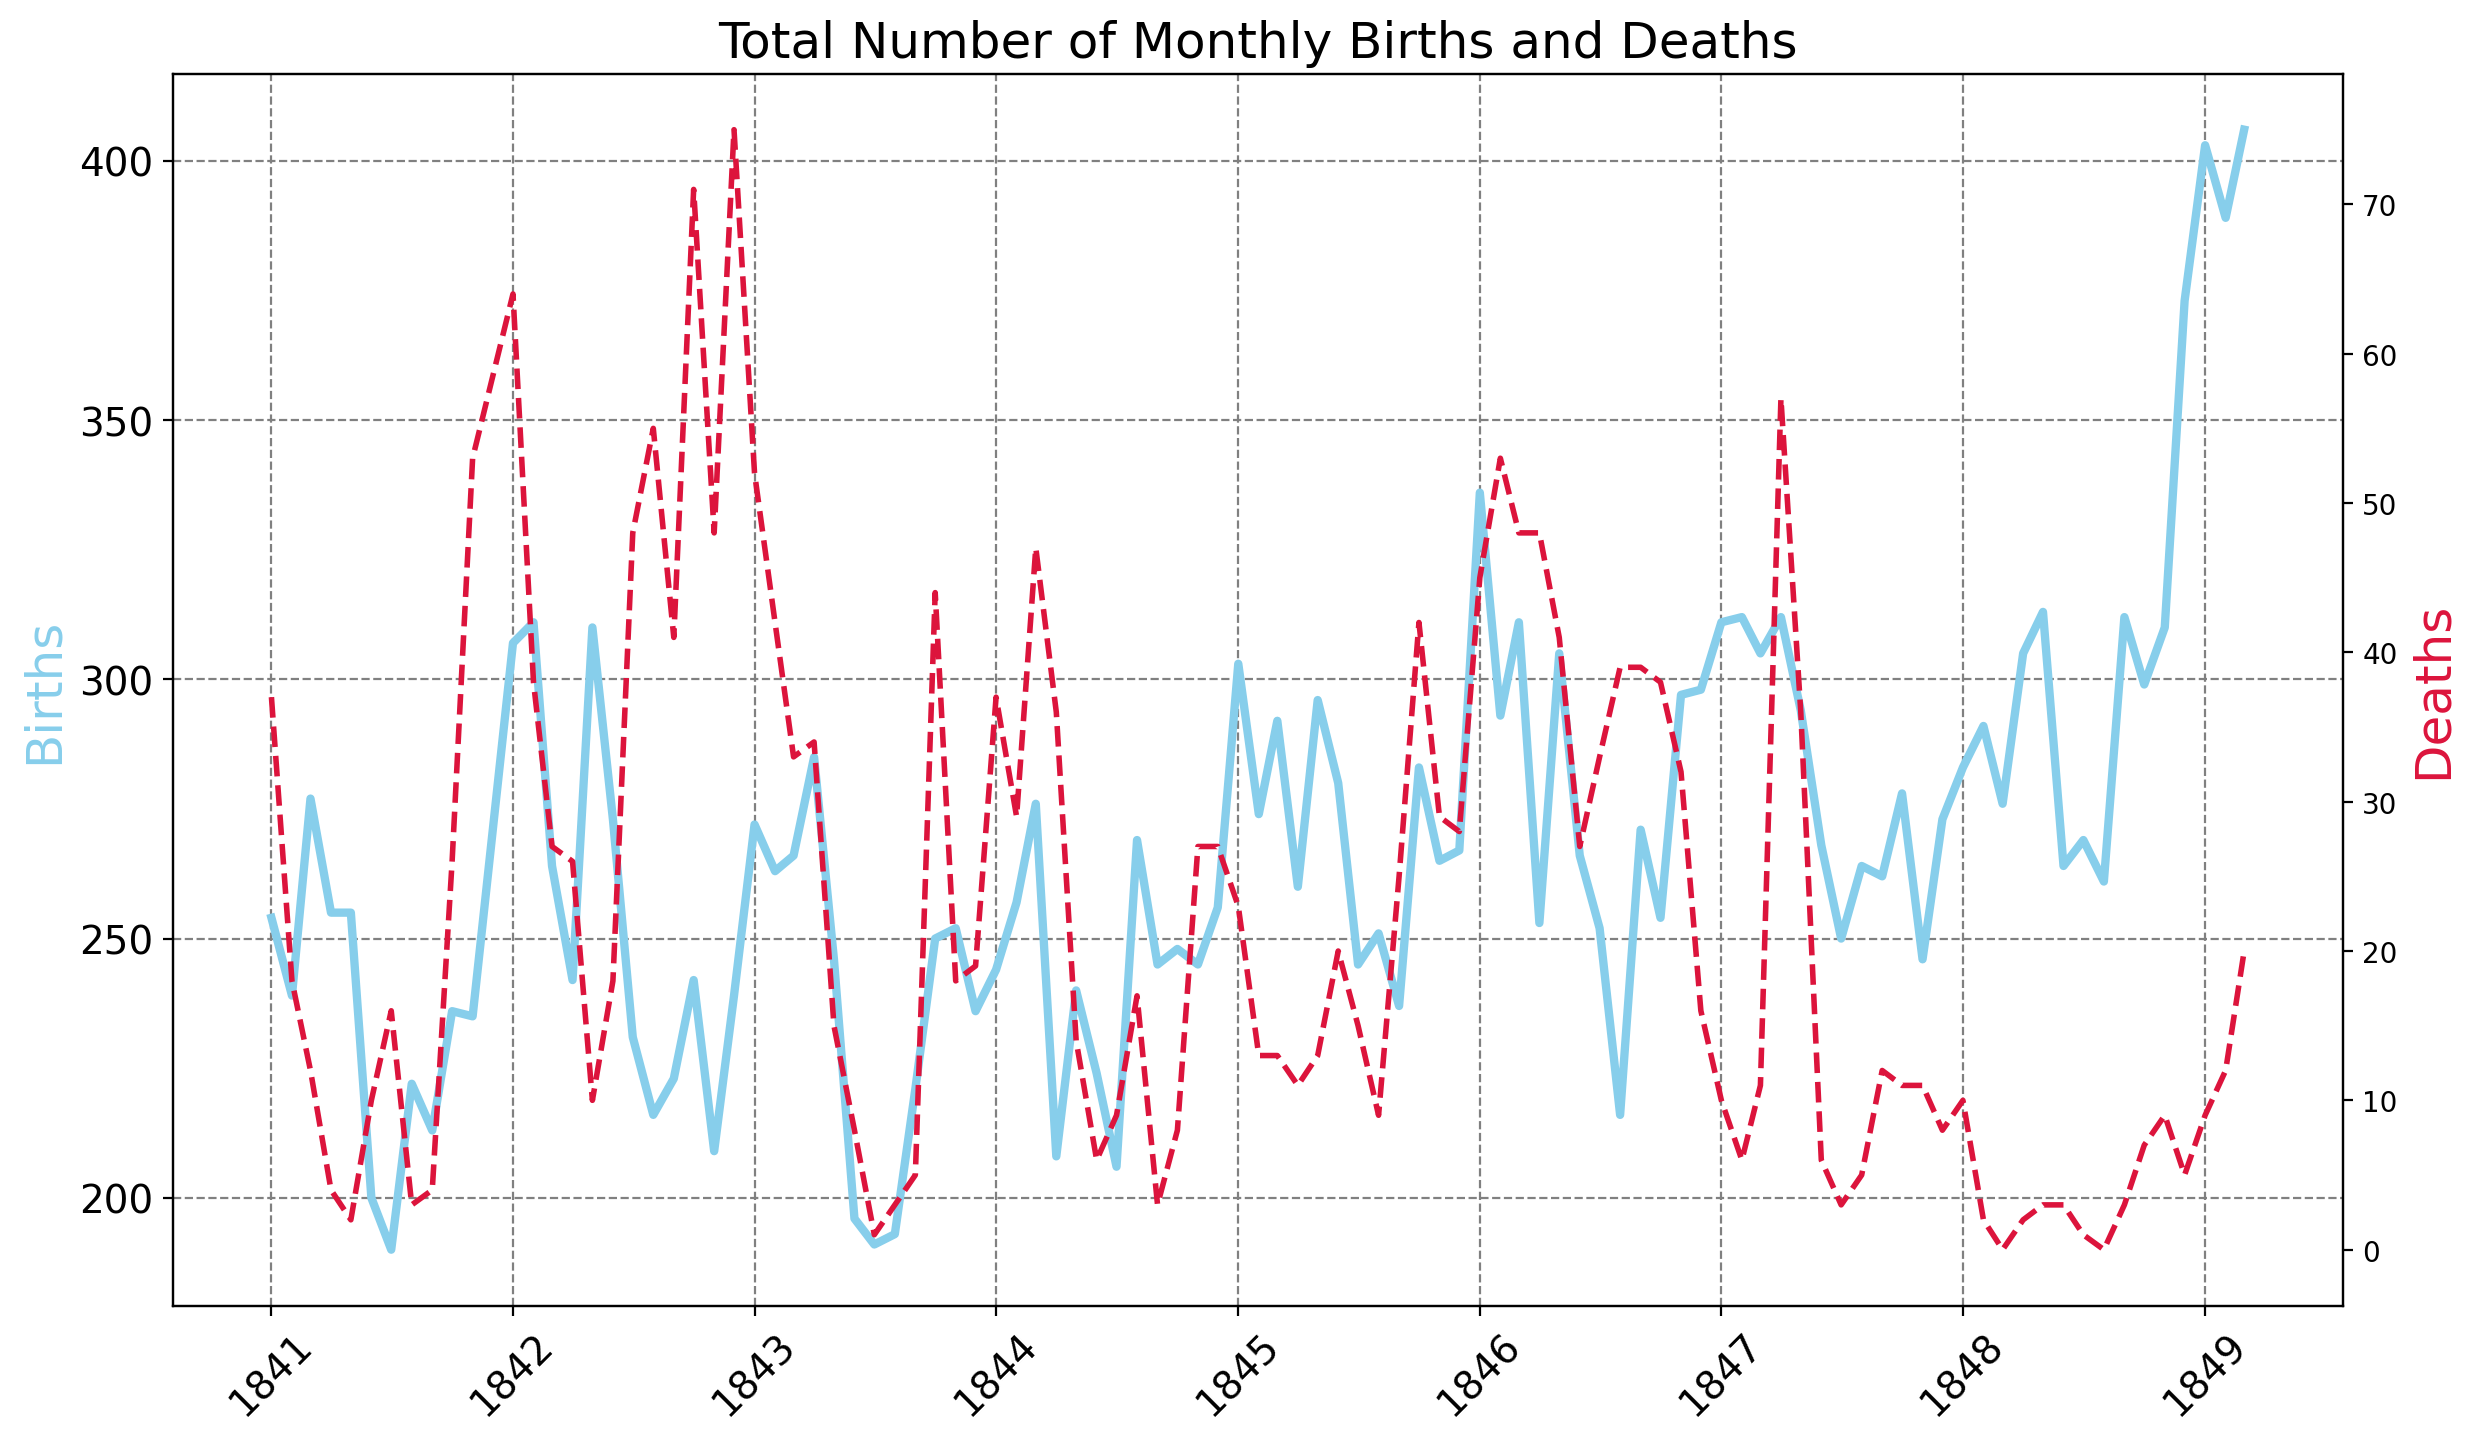

In [65]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)
 
# # Use Locators
# ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
# ax1.xaxis.set_major_locator(years)
# ax1.xaxis.set_major_formatter(years_fmt)
# ax1.xaxis.set_minor_locator(months)
 
ax1.grid(color='grey', linestyle='--')
 
ax1.plot(df_monthly.date, 
         df_monthly.births, 
         color='skyblue', 
         linewidth=3)
 
ax2.plot(df_monthly.date, 
         df_monthly.deaths, 
         color='crimson', 
         linewidth=2, 
         linestyle='--')
 
plt.show()


In [33]:
# yealry data split by clinic
line = px.line(df_yearly, 
               x='year', 
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')
 
line.show()

In [34]:
line = px.line(df_yearly, 
               x='year', 
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')
 
line.show()

In [35]:
# proportion of deaths each clinic
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births

In [36]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

Average death rate in clinic 1 is 9.92%.


In [37]:
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 2 is 3.88%.


In [38]:
line = px.line(df_yearly, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Proportion of Yearly Deaths by Clinic')
 
line.show()

In [39]:
# Effect of handwashing
df_monthly['pct_deaths'] = df_monthly.deaths/df_monthly.births

In [45]:

handwashing_start = pd.to_datetime('1846-06-01')


In [46]:
before_washing = df_monthly[df_monthly.date < handwashing_start]
after_washing = df_monthly[df_monthly.date >= handwashing_start]


In [47]:
bw_rate = before_washing.deaths.sum() / before_washing.births.sum() * 100
aw_rate = after_washing.deaths.sum() / after_washing.births.sum() * 100
print(f'Average death rate before 1847 was {bw_rate:.4}%')
print(f'Average death rate AFTER 1847 was {aw_rate:.3}%')


Average death rate before 1847 was 10.6%
Average death rate AFTER 1847 was 4.87%


In [48]:
# rolling average of death rate
roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

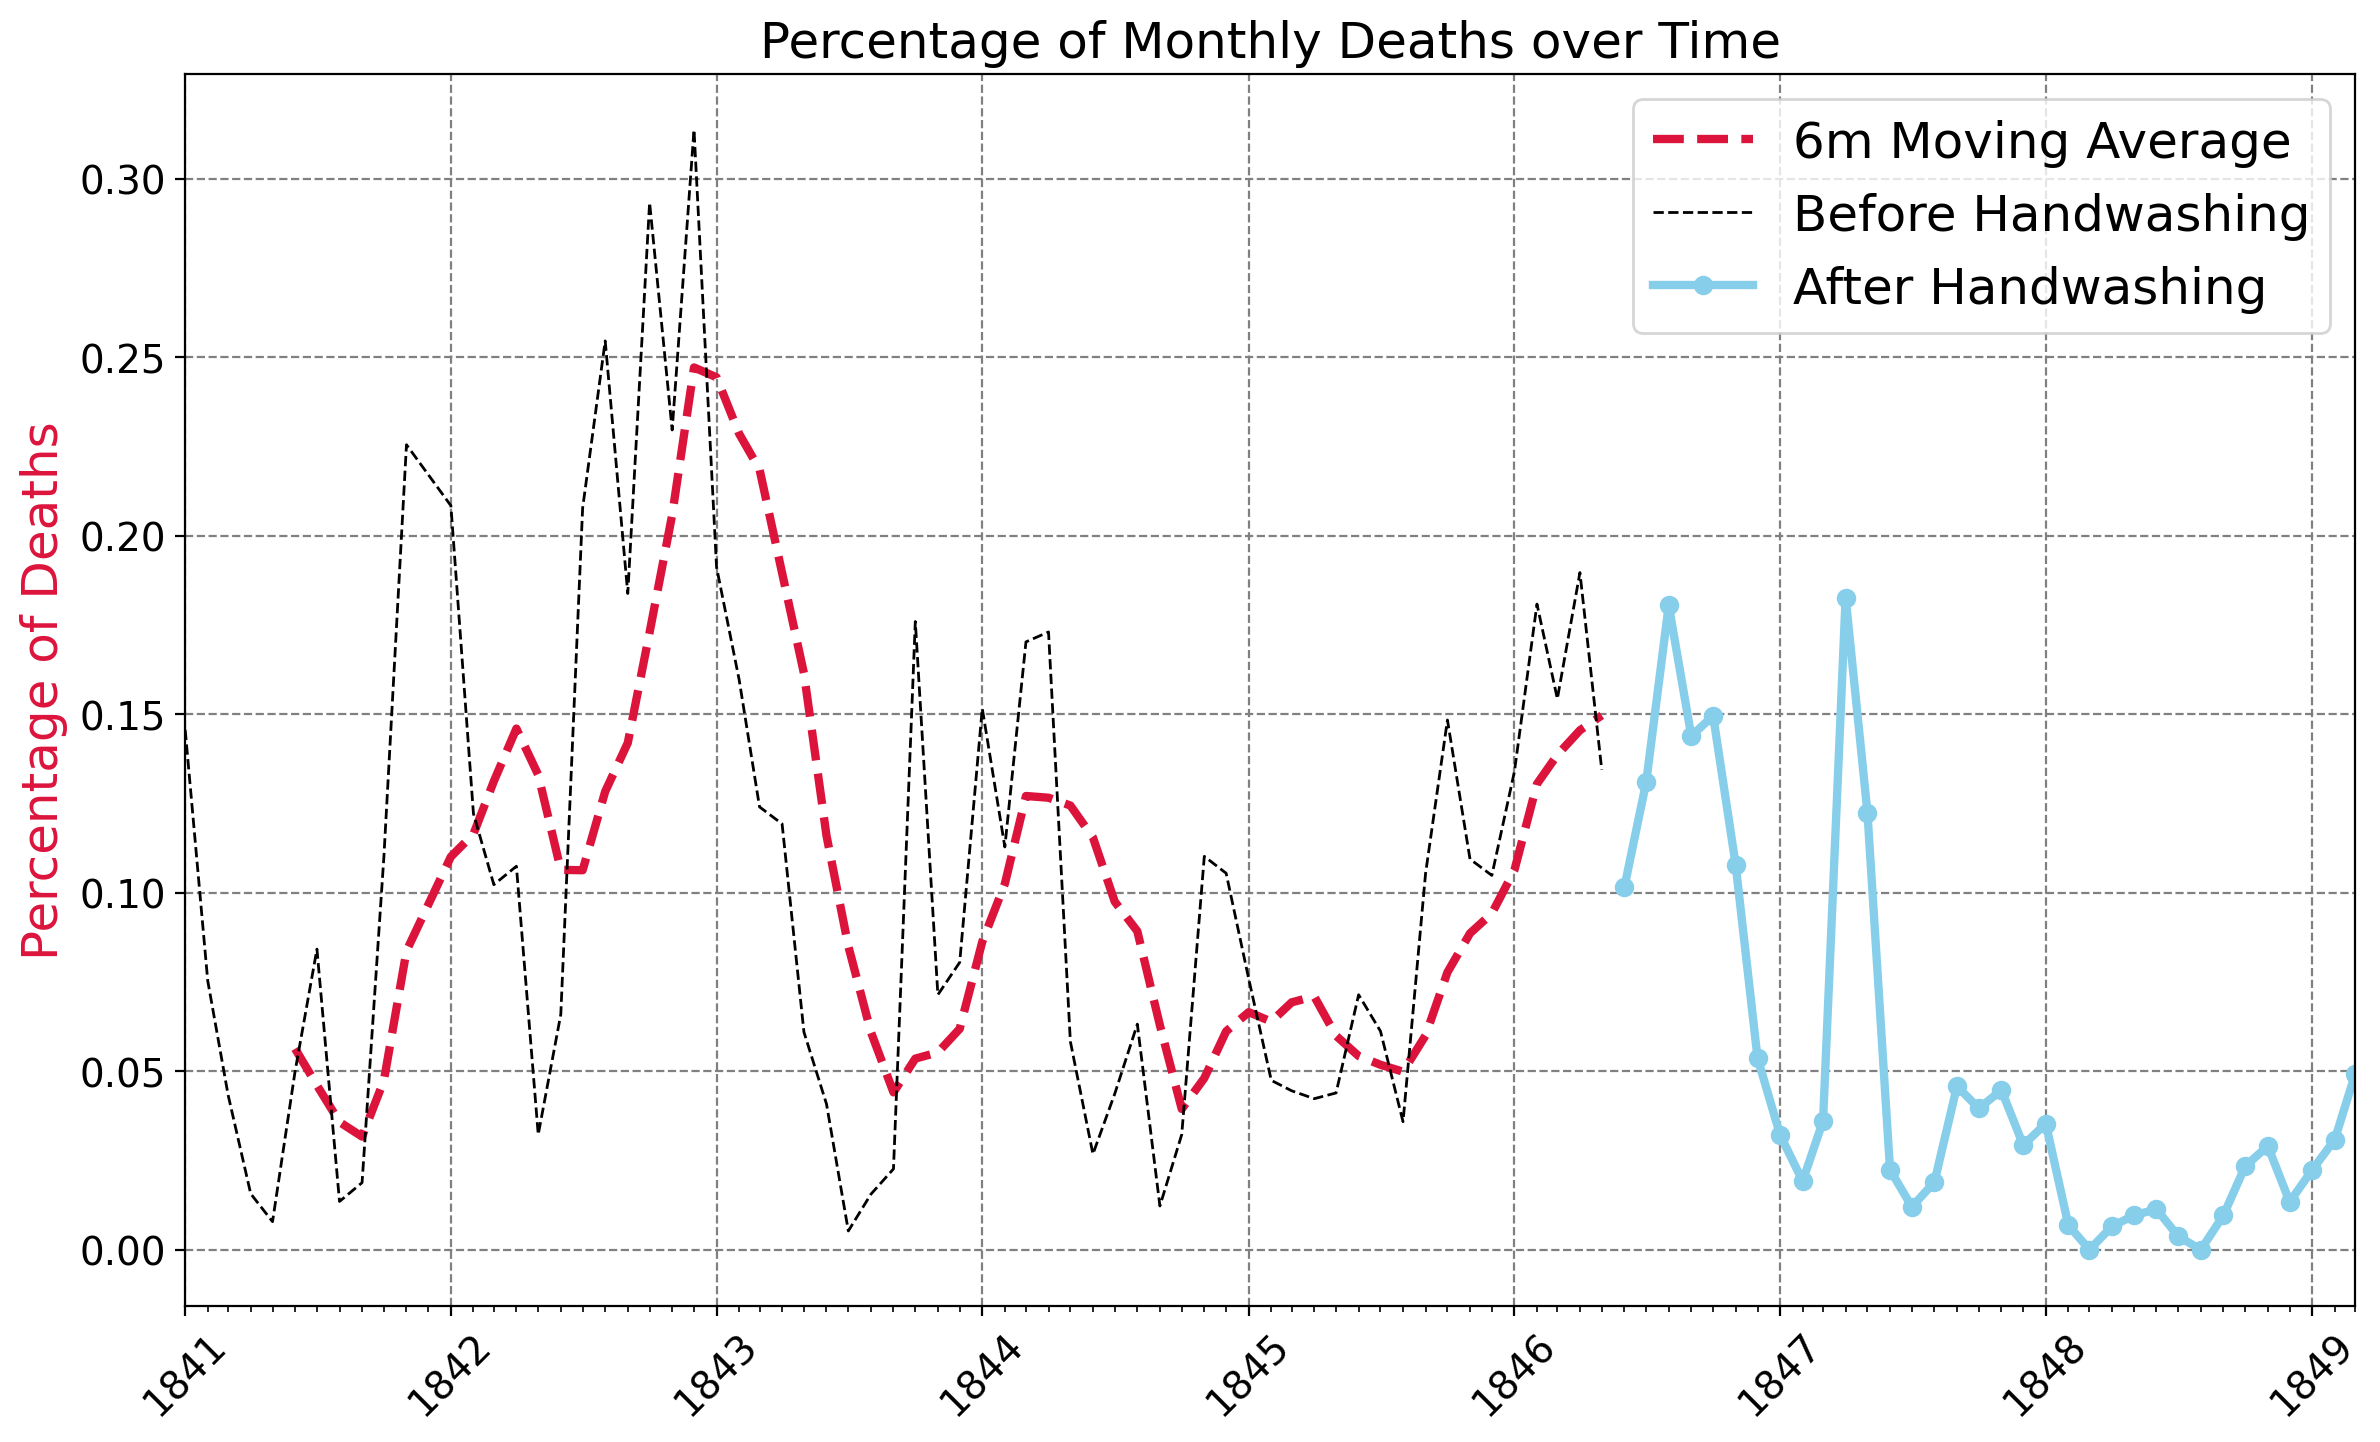

In [51]:
# subsections of line chart
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(roll_df.index, 
                    roll_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(before_washing.date, 
                    before_washing.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(after_washing.date, 
                    after_washing.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
plt.show()

In [52]:
# visualizing distribution and testing statistical significance
# difference between average and monthly death rate
avg_prob_before = before_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')
 
avg_prob_after = after_washing.pct_deaths.mean() * 100
print(f'Chance of death during childbirth AFTER handwashing: {avg_prob_after:.3}%.')
 
mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')
 
times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')


Chance of death during childbirth before handwashing: 10.5%.
Chance of death during childbirth AFTER handwashing: 5.07%.
Handwashing reduced the monthly proportion of deaths by 5.43%!
This is a 2.1x improvement!


In [55]:
# death rate change before and after hand washing
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

In [56]:
box = px.box(df_monthly, 
             x='washing_hands', 
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')
 
box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)
 
box.show()

In [57]:
# monthly distribution of outcomes
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 
hist.show()

C:\Users\n\AppData\Local\Temp\ipykernel_10868\1455971891.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\n\AppData\Local\Temp\ipykernel_10868\1455971891.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




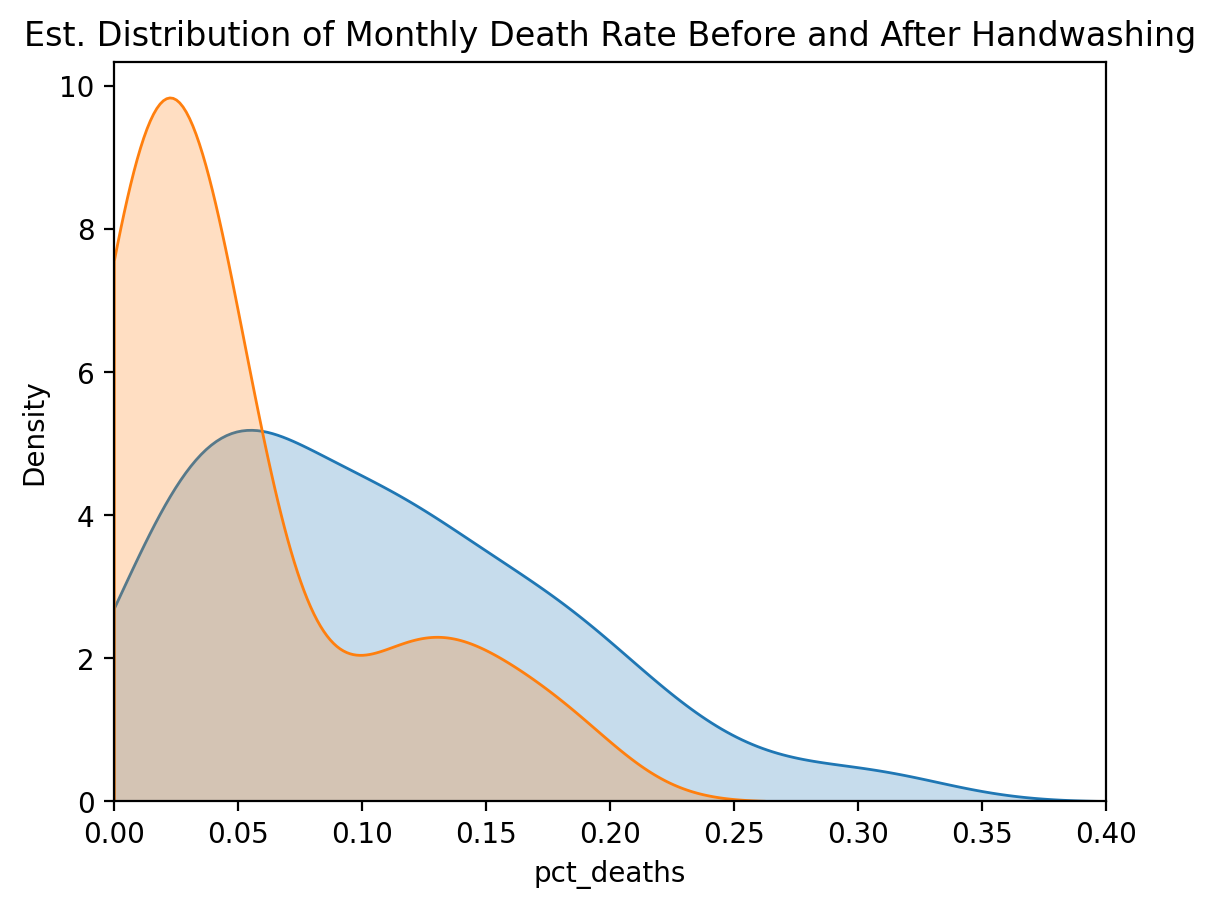

In [60]:
# using KDE 
plt.figure(dpi=200)
sns.kdeplot(before_washing.pct_deaths, 
            shade=True,
            clip=(0,1))
sns.kdeplot(after_washing.pct_deaths, 
            shade=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()


In [62]:
# using t-tests for statistical significance
t_stat, p_value = stats.ttest_ind(a=before_washing.pct_deaths, 
                                  b=after_washing.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0002504345
t-statstic is 3.804
